# Reading the file



Importing the necessary packages

In [4]:
import pandas as pd

Reading the file as a CSV

In [5]:
df1 = pd.read_csv('Building_Permits_S.csv', index_col=0)
print(df1.head())

  Permit Number  Permit Type  Permit Type Definition Permit Creation Date  \
0       M871747            8  otc alterations permit           2018-01-02   
1  201801027649            8  otc alterations permit           2018-01-02   
2  201801027679            8  otc alterations permit           2018-01-02   
3  201801027692            8  otc alterations permit           2018-01-02   
4  201801027696            8  otc alterations permit           2018-01-02   

  Block  Lot  Street Number Street Number Suffix Street Name Street Suffix  \
0  6511  028           1141                  NaN     Dolores            St   
1  0127  138            999                  NaN       Green            St   
2  0080  031            101                  NaN     Lombard            St   
3  1848  046           1420                  NaN        06th            Av   
4  0669  009           1156                  NaN      Sutter            St   

   ...  Primary Address Flag Supervisor District  \
0  ...          

<ipython-input-5-4fba7191de42>:1: DtypeWarning: Columns (23,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('Building_Permits_S.csv', index_col=0)


# How polynomial regression work

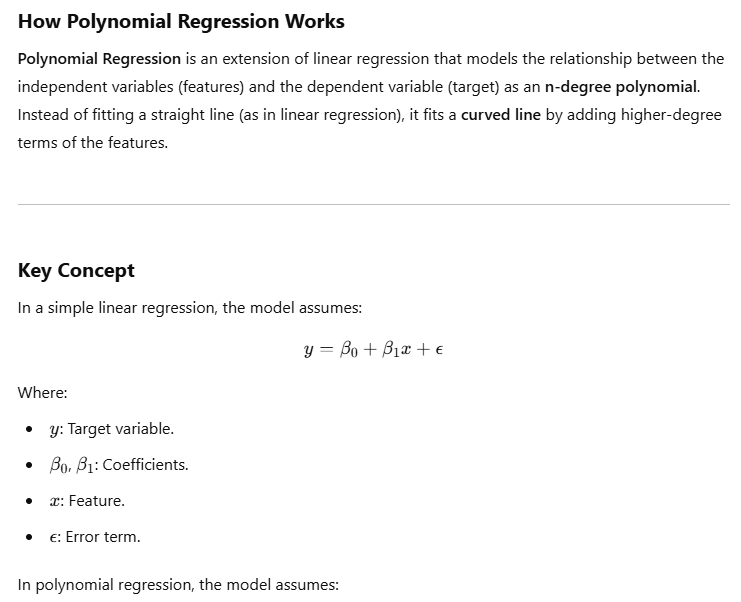

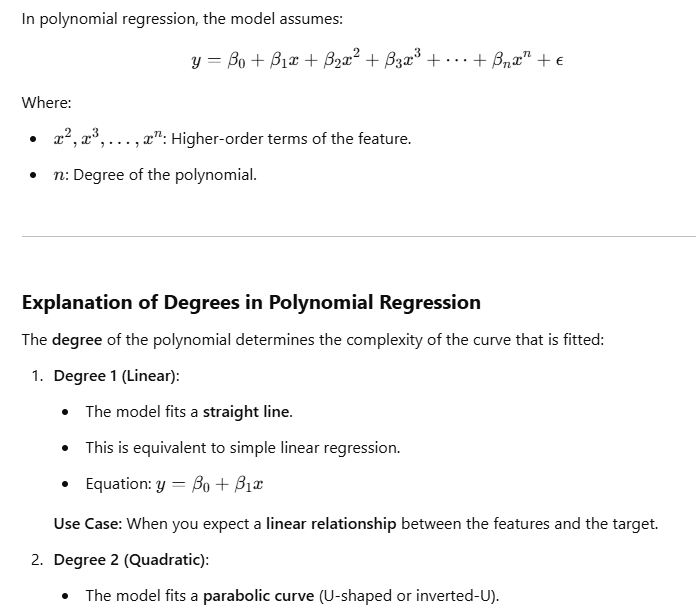

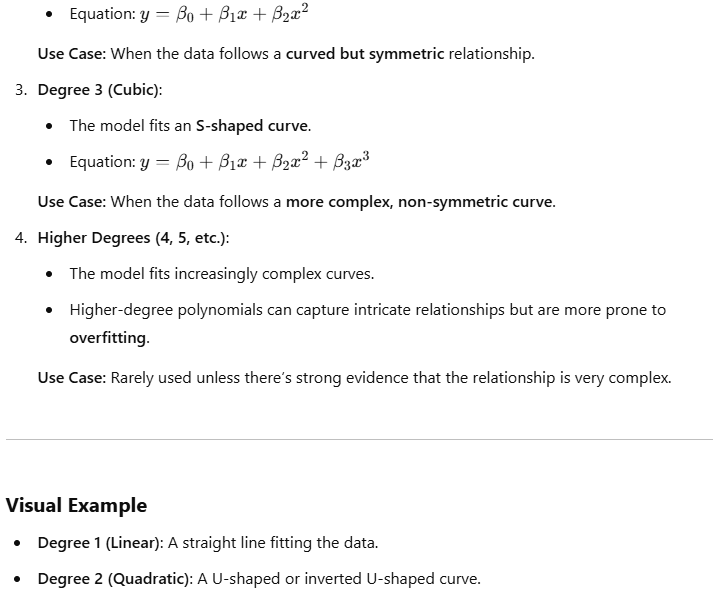

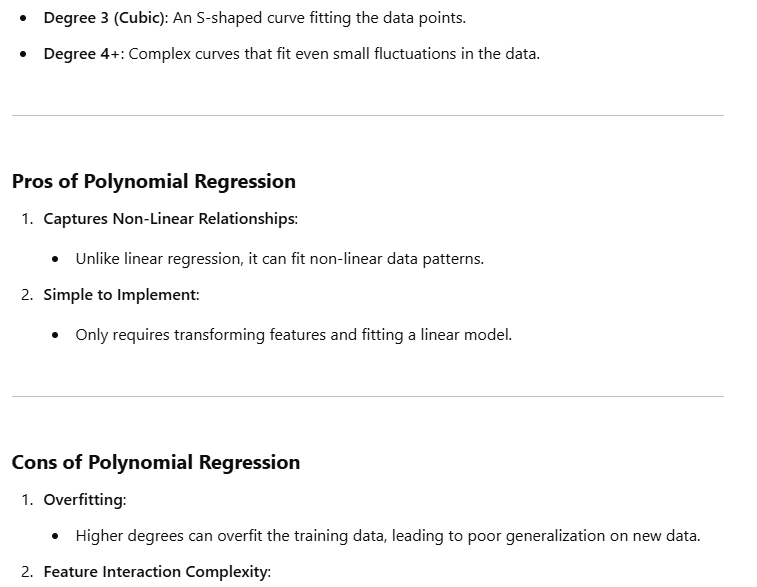

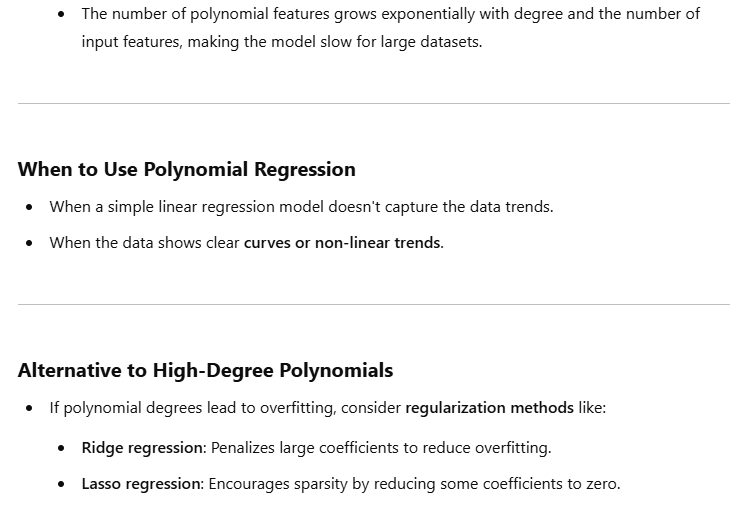

# Polynomial regression - Multiple features combination

Import the necessary libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Filling missing values in the dataset (with 0)

In [7]:
df1.fillna(0, inplace=True)

Defining the target and combinations of features

In [8]:
target_column = 'Days_to_Issue'
feature_combinations = [
    ['Existing Construction Type'],
    ['Permit Type'],
    ['Existing Construction Type', 'Permit Type'],
    ['Permit Creation Month'],
    ['Existing Construction Type', 'Permit Creation Month'],
    ['Existing Construction Type', 'Permit Type', 'Permit Creation Month']
]

Ensuring Permit Creation Month exists

In [9]:
if 'Permit Creation Month' not in df1.columns:
    df1['Permit Creation Month'] = pd.to_datetime(df1['Permit Creation Date']).dt.month

Splitting the data into training and validation sets

In [10]:
X = df1.drop(columns=[target_column])
y = df1[target_column]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

Define degree values for polynomial regression

In [11]:
degree_values = [1, 2, 3]  # Linear, quadratic, cubic

Initializing the polynomial regression model

*   Looping through feature combinations and polynomial degrees
*   Making predictions and calculating the r2 score



In [12]:
results = []

for features in feature_combinations:
    X_train_subset = X_train[features]
    X_valid_subset = X_valid[features]

    for degree in degree_values:
        # Polynomial feature transformation
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train_subset)
        X_valid_poly = poly.transform(X_valid_subset)

        # Linear Regression on polynomial features
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Making predictions and calculate R² score
        predictions = model.predict(X_valid_poly)
        score = r2_score(y_valid, predictions)

        # Appending results
        results.append({
            "Feature Combination": str(features),  # Convert list to string for readability
            "Degree": degree,
            "R² Score": score
        })

Converting results to dataframe

In [13]:
results_df = pd.DataFrame(results)
print("\nPerformance of Polynomial Regression for Different Feature Combinations and Degrees:")
print(results_df.sort_values(by=["Feature Combination", "Degree"], ascending=True))


Performance of Polynomial Regression for Different Feature Combinations and Degrees:
                                  Feature Combination  Degree  R² Score
12  ['Existing Construction Type', 'Permit Creatio...       1  0.016484
13  ['Existing Construction Type', 'Permit Creatio...       2  0.016665
14  ['Existing Construction Type', 'Permit Creatio...       3  0.016628
15  ['Existing Construction Type', 'Permit Type', ...       1  0.223606
16  ['Existing Construction Type', 'Permit Type', ...       2  0.238607
17  ['Existing Construction Type', 'Permit Type', ...       3  0.241320
6       ['Existing Construction Type', 'Permit Type']       1  0.223815
7       ['Existing Construction Type', 'Permit Type']       2  0.238676
8       ['Existing Construction Type', 'Permit Type']       3  0.240089
0                      ['Existing Construction Type']       1  0.016893
1                      ['Existing Construction Type']       2  0.017293
2                      ['Existing Construction Typ

Plotting the comparison chart

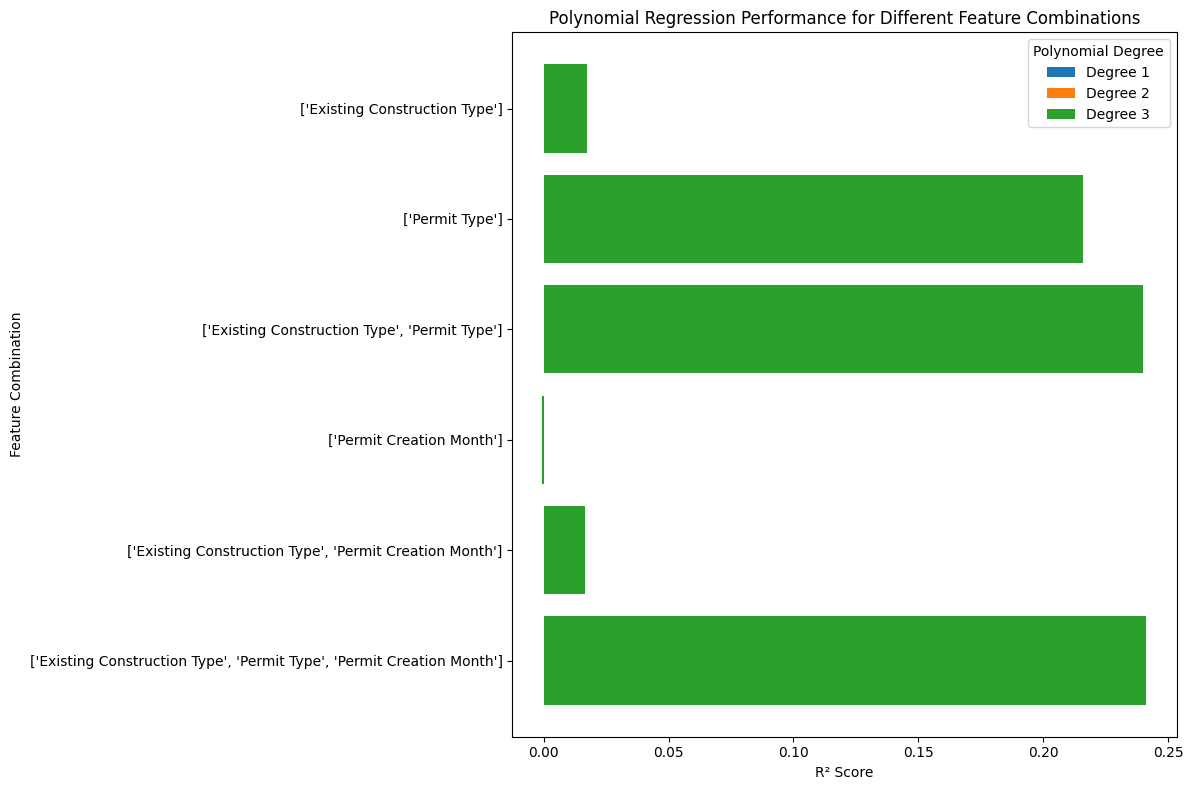

In [14]:
plt.figure(figsize=(12, 8))
for degree in degree_values:
    subset = results_df[results_df['Degree'] == degree]
    plt.barh(subset['Feature Combination'], subset['R² Score'], label=f'Degree {degree}')

plt.xlabel("R² Score")
plt.ylabel("Feature Combination")
plt.title("Polynomial Regression Performance for Different Feature Combinations")
plt.legend(title="Polynomial Degree")
plt.gca().invert_yaxis()  # Show the best result at the top
plt.tight_layout()
plt.show()